In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("steady_clock/tripreport.csv")
df

,TCP Received,Converted,IPC bytes out,Avg. bytes/msg,Avg. convert time,Avg. thread time,IPC messages,Avg. publish time,Publish thread time,First latency
0,1,1,2632,2632,0.002423,0.179814,1,0.034970,0.034973,0.138556
1,1,1,2632,2632,0.002000,0.030727,1,0.006262,0.006266,0.018815
2,1,1,2632,2632,0.002203,0.025670,1,0.005880,0.005884,0.013692
3,1,1,2632,2632,0.002289,0.026128,1,0.006059,0.006064,0.013935
4,1,1,2632,2632,0.002061,0.028114,1,0.006076,0.006080,0.015598
...,...,...,...,...,...,...,...,...,...,...
8188,1,1,2632,2632,0.002219,0.012914,1,0.003119,0.003121,0.003622
8189,1,1,2632,2632,0.001813,0.012571,1,0.002791,0.002794,0.003692
8190,1,1,2632,2632,0.002255,0.012341,1,0.003010,0.003012,0.003154
8191,1,1,2632,2632,0.001099,0.015951,1,0.003540,0.006435,0.001146


In [3]:
y_lat = df['First latency']
y_conv = df['Avg. convert time']
y_pub = df['Avg. publish time']

# JSON to Arrow conversion is included in y_lat
y_total = y_lat + y_pub

num_rows = df.count()[0]
x = np.arange(0, num_rows)

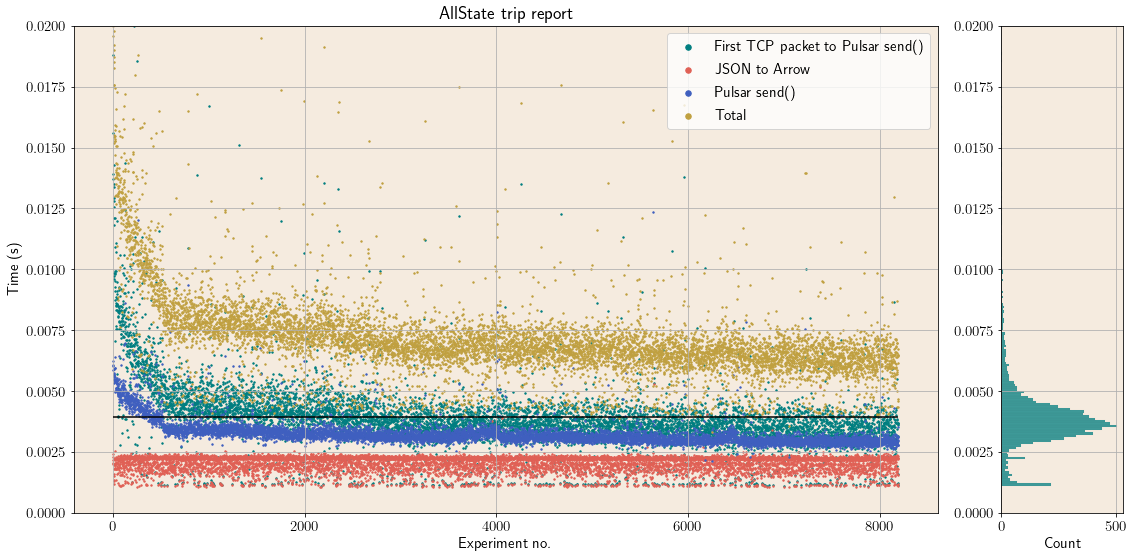

In [4]:
plt.rcParams.update({"text.usetex": True})
plt.rcParams.update({"font.size": '15'})

background = '#f5ebdf'
colors = ['#000000', '#c0a040', '#007e80', '#e06055', '#3f5fbf', '#d275de', '#7bb144', '#888888']

fig = plt.figure(figsize=(16, 8))
ax_left = fig.add_subplot(1, 6, (1, 5))
ax_right = fig.add_subplot(1, 6, 6, sharey=ax_left)

ax_left.scatter(x=x, y=y_lat, s=2, c=colors[2], label='First TCP packet to Pulsar send()')
ax_left.scatter(x=x, y=y_conv, s=2, c=colors[3], label='JSON to Arrow')
ax_left.scatter(x=x, y=y_pub, s=2, c=colors[4], label='Pulsar send()')
ax_left.scatter(x=x, y=y_total, s=2, c=colors[1], label='Total')

sns.histplot(ax=ax_right, y=y_lat, color=colors[2])

ax_left.hlines(df["First latency"].mean(), 0, num_rows, color=colors)

ax_left.grid(which='both')
ax_right.grid(which='both')

ax_left.set_ylabel('Time (s)')
ax_right.set_ylabel(None)
ax_left.set_xlabel('Experiment no.')

ax_left.set_facecolor(background)
ax_right.set_facecolor(background)

#ax_left.set_yscale('log')
ax_left.set_ylim([0, 0.02])

leg = ax_left.legend()
for h in leg.legendHandles:
    h._sizes = [30]

ax_left.set_title('AllState trip report')
    
fig.set_facecolor('white')
fig.tight_layout()

fig.savefig("tripreport.pdf")